In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from operator import itemgetter
from collections import OrderedDict
import operator
import numpy as np
import pandas as pd

In [2]:
practice_graph = nx.Graph()

practice_graph.add_edge("A", "B")
practice_graph.add_edge("A", "C")
practice_graph.add_edge("B", "C")
# TODO: Add more here...
practice_graph.add_edge("C", "D")
practice_graph.add_edge("B", "D")
practice_graph.add_edge("C", "F")
practice_graph.add_edge("D", "F")
practice_graph.add_edge("D", "E")

In [3]:
assert len(practice_graph.nodes()) == 6
assert len(practice_graph.edges()) == 8

# Test shape of practice graph
assert set(practice_graph.neighbors("A")) == set(["B", "C"])
assert set(practice_graph.neighbors("B")) == set(["A", "D", "C"])
assert set(practice_graph.neighbors("C")) == set(["A", "B", "D", "F"])
assert set(practice_graph.neighbors("D")) == set(["B", "C", "E", "F"])
assert set(practice_graph.neighbors("E")) == set(["D"])
assert set(practice_graph.neighbors("F")) == set(["C", "D"])

In [4]:
def draw_practice_graph():
    """Draw practice_graph to the screen.
    """
    nx.draw_networkx(practice_graph)
    plt.show()

/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


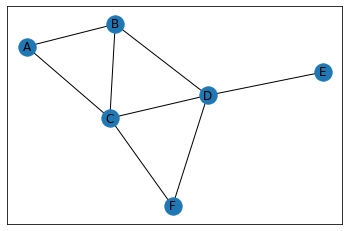

In [5]:
draw_practice_graph()

In [6]:
rj = nx.Graph()
rj.add_edge("Nurse", "Juliet")
rj.add_edge("Juliet", "Tybalt")
rj.add_edge("Juliet", "Friar Laurence")
rj.add_edge("Juliet", "Romeo")
rj.add_edge("Juliet", "Capulet")
rj.add_edge("Tybalt", "Capulet")
rj.add_edge("Romeo", "Friar Laurence")
rj.add_edge("Romeo", "Benvolio")
rj.add_edge("Romeo", "Montague")
rj.add_edge("Romeo", "Mercutio")
rj.add_edge("Benvolio", "Montague")
rj.add_edge("Montague", "Escalus")
rj.add_edge("Escalus", "Capulet")
rj.add_edge("Escalus", "Mercutio")
rj.add_edge("Escalus", "Paris")
rj.add_edge("Paris", "Capulet")
rj.add_edge("Paris", "Mercutio")

In [7]:
assert len(rj.nodes()) == 11
assert len(rj.edges()) == 17

# Test shape of Romeo-and-Juliet graph
assert set(rj.neighbors("Nurse")) == set(["Juliet"])
assert set(rj.neighbors("Friar Laurence")) == set(["Juliet", "Romeo"])
assert set(rj.neighbors("Tybalt")) == set(["Juliet", "Capulet"])
assert set(rj.neighbors("Benvolio")) == set(["Romeo", "Montague"])
assert set(rj.neighbors("Paris")) == set(["Escalus", "Capulet", "Mercutio"])
assert set(rj.neighbors("Mercutio")) == set(["Paris", "Escalus", "Romeo"])
assert set(rj.neighbors("Montague")) == set(["Escalus", "Romeo", "Benvolio"])
assert set(rj.neighbors("Capulet")) == \
    set(["Juliet", "Tybalt", "Paris", "Escalus"])
assert set(rj.neighbors("Escalus")) == \
    set(["Paris", "Mercutio", "Montague", "Capulet"])
assert set(rj.neighbors("Juliet")) == \
    set(["Nurse", "Tybalt", "Capulet", "Friar Laurence", "Romeo"])
assert set(rj.neighbors("Romeo")) == \
    set(["Juliet", "Friar Laurence", "Benvolio", "Montague", "Mercutio"])

In [8]:
def draw_rj():
    """Draw the rj graph to the screen and to a file.
    """
    nx.draw_networkx(rj)
    plt.savefig("romeo-and-juliet.pdf")
    plt.show()


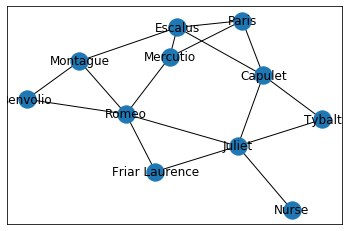

In [9]:
draw_rj()

In [10]:
def friends(graph, user):
    """Returns a set of the friends of the given user, in the given graph.
    """
    # This function has already been implemented for you.
    # You do not need to add any more code to this (short!) function.
    return set(graph.neighbors(user))

In [11]:
assert friends(rj, "Mercutio") == set(['Romeo', 'Escalus', 'Paris'])


In [12]:
def friends_of_friends(graph, user):
    """Returns a set of friends of friends of the given user, in the given 
    graph. The result does not include the given user nor any of that user's
    friends.
    """
    H = nx.ego_graph(graph, user, radius=2)
    f_of_f = set(H)
    f = friends(graph, user)
    f_of_f = f_of_f.difference(f)
    f_of_f.discard(user)
    return f_of_f

In [13]:
assert friends_of_friends(rj, "Mercutio") == \
    set(['Benvolio', 'Capulet', 'Friar Laurence', 'Juliet', 'Montague'])

In [14]:
def common_friends(graph, user1, user2):
    """Returns the set of friends that user1 and user2 have in common.
    """
    f1 = friends(graph, user1)
    f2 = friends(graph, user2)
    c_f = set(f1.intersection(f2))
    return c_f

In [15]:
assert common_friends(practice_graph,"A", "B") == set(['C'])
assert common_friends(practice_graph,"A", "D") == set(['B', 'C'])
assert common_friends(practice_graph,"A", "E") == set([])
assert common_friends(practice_graph,"A", "F") == set(['C'])
assert common_friends(rj, "Mercutio", "Nurse") == set()
assert common_friends(rj, "Mercutio", "Romeo") == set()
assert common_friends(rj, "Mercutio", "Juliet") == set(["Romeo"])
assert common_friends(rj, "Mercutio", "Capulet") == set(["Escalus", "Paris"])

In [16]:
def number_of_common_friends_map(graph, user):
    """Returns a map (a dictionary), mapping from each user U to the number 
    of friends U has in common with the given user. The map keys are the 
    users who have at least one friend in common with the given user, 
    and are neither the given user nor one of the given user's friends.
    Example: a graph called my_graph and user "A" 
    (Note: This is NOT the practice_graph used in the assignment writeup.)
    Here is what is relevant about my_graph:
        - "A" and "B" have two friends in common
        - "A" and "C" have one friend in common
        - "A" and "D" have one friend in common
        - "A" and "E" have no friends in common
        - "A" is friends with "D" (but not with "B" or "C")
    Here is what should be returned:
      number_of_common_friends_map(my_graph, "A")  =>   { 'B':2, 'C':1 }
    """
    f_of_f = friends_of_friends(graph, user)
    dic = {}
    for i in f_of_f:
        num = len(common_friends(graph,i, user))
        dic.update({i : num})
    dic = dict(sorted(dic.items()))
    return dic

In [17]:
assert number_of_common_friends_map(practice_graph, "A") == {'D': 2, 'F': 1}
assert number_of_common_friends_map(rj, "Mercutio") == \
    { 'Benvolio': 1, 'Capulet': 2, 'Friar Laurence': 1, 
      'Juliet': 1, 'Montague': 2 }

In [18]:
def getList(dict): 
    list = [] 
    for key in dict.keys(): 
        list.append(key) 
          
    return list

In [19]:
def number_map_to_sorted_list(map_with_number_vals):
    """Given map_with_number_vals, a dictionary whose values are numbers, 
    return a list of the keys in the dictionary.
    The keys are sorted by the number value they map to, from greatest
    number down to smallest number.
    When two keys map to the same number value, the keys are sorted by their
    natural sort order for whatever type the key is, from least to greatest.
    """
    sorted_d = dict( sorted(map_with_number_vals.items(), key=operator.itemgetter(1),reverse=True))
    a = getList(sorted_d)
    return a

In [20]:
assert number_map_to_sorted_list({"a":5, "b":2, "c":7, "d":5, "e":5}) == ['c', 'a', 'd', 'e', 'b']

In [21]:
def recommend_by_number_of_common_friends(graph, user):
    """Return a list of friend recommendations for the given user.
    The friend recommendation list consists of names/IDs of people in
    the graph who are not yet a friend of the given user.  The order
    of the list is determined by the number of common friends (people
    with the most common friends are listed first).  In the
    case of a tie in number of common friends, the names/IDs are
    sorted by their natural sort order, from least to greatest.
    """
    c_f = number_of_common_friends_map(graph, user)
    a = number_map_to_sorted_list(c_f)
    return a

In [22]:
assert recommend_by_number_of_common_friends(practice_graph,"A") == ['D', 'F']
assert recommend_by_number_of_common_friends(rj, "Mercutio") == \
    ['Capulet', 'Montague', 'Benvolio', 'Friar Laurence', 'Juliet']

In [23]:
def influence_map(graph, user):
    """Returns a map (a dictionary) mapping from each person P to their 
    influence score, with respect to the given user. The map only 
    contains people who have at least one friend in common with the given 
    user and are neither the user nor one of the users's friends. 
    See the assignment for the definition of influence scores.
    """
    f_of_f = friends_of_friends(graph, user)
    dic = {}
    for i in f_of_f:
        score = 0
        c_f = common_friends(graph,i, user)
        for j in c_f:
             score += (1/len(friends(graph, j)))
        dic.update({i : score})
    dic = dict(sorted(dic.items()))
    return dic  

In [24]:
assert influence_map(rj, "Mercutio") == \
    { 'Benvolio': 0.2, 'Capulet': 0.5833333333333333, 
      'Friar Laurence': 0.2, 'Juliet': 0.2, 'Montague': 0.45 }

In [25]:
def recommend_by_influence(graph, user):
    """Return a list of friend recommendations for the given user.
    The friend recommendation list consists of names/IDs of people in
    the graph who are not yet a friend of the given user.  The order
    of the list is determined by the influence score (people
    with the biggest influence score are listed first).  In the
    case of a tie in influence score, the names/IDs are sorted
    by their natural sort order, from least to greatest.
    """
    c_f = influence_map(graph, user)
    a = number_map_to_sorted_list(c_f)
    return a   

In [26]:
assert recommend_by_influence(rj, "Mercutio") == \
    ['Capulet', 'Montague', 'Benvolio', 'Friar Laurence', 'Juliet']

In [27]:
unchanged_list = []
changed_list = []
for i in rj.nodes:
    if recommend_by_influence(rj, i) == recommend_by_number_of_common_friends(rj, i):
        unchanged_list.append(i)
    else:
        changed_list.append(i)
print("Unchanged Recommendations:", end =" ") 
print(unchanged_list) 
print("Changed Recommendations:", end =" ") 
print(changed_list)

Unchanged Recommendations: ['Nurse', 'Friar Laurence', 'Benvolio', 'Mercutio', 'Escalus']
Changed Recommendations: ['Juliet', 'Tybalt', 'Romeo', 'Capulet', 'Montague', 'Paris']


In [28]:
fb_txt = np.loadtxt("facebook-links.txt", usecols = (0,1), dtype=int)
fb = pd.DataFrame(fb_txt)
facebook = nx.from_pandas_edgelist(fb, source = 0, target = 1)

assert len(facebook.nodes()) == 63731
assert len(facebook.edges()) == 817090

In [29]:
for i in range(1000, len(facebook.nodes()), 1000):
    fb_cf = recommend_by_number_of_common_friends(facebook, i)
    print("%d (by number_of_common_friends):" %i, end =" ")
    print(fb_cf[0:10])

1000 (by number_of_common_friends): [23, 453, 456, 467, 1140, 2068, 451, 469, 472, 746]
2000 (by number_of_common_friends): [1686, 1693, 639, 1160, 1408, 1436, 1685, 1691, 1692, 1694]
3000 (by number_of_common_friends): [2868, 1156, 3004, 2260, 3002, 244, 639, 867, 2999, 3018]
4000 (by number_of_common_friends): [284, 3423, 3978, 4012, 3159, 3975, 3977, 3992, 4003, 4004]
5000 (by number_of_common_friends): [1685, 2152, 2218, 1686, 1687, 1691, 1693, 2660, 1689, 2141]
6000 (by number_of_common_friends): [22596, 22599, 6015, 40834, 903, 37969, 5792, 40833, 6010, 5232]
7000 (by number_of_common_friends): [24649, 20401, 34865, 31156, 20934, 38854, 20010, 6956, 9660, 10221]
8000 (by number_of_common_friends): [1209, 7999, 17802, 1299, 3169, 4481, 5280, 5615, 6662, 13283]
9000 (by number_of_common_friends): [19228, 10397, 19231, 1632, 7157, 18388, 19286, 1466, 2217, 18397]
10000 (by number_of_common_friends): [528, 534, 6027, 6237, 32097, 280, 292, 388, 1304, 1337]
11000 (by number_of_common_

In [30]:
for i in range(1000, len(facebook.nodes()), 1000):
    fb_i = recommend_by_influence(facebook, i)
    print("%d (by influence):" %i, end =" ")
    print(fb_i[0:10])

1000 (by influence): [23, 453, 456, 467, 1140, 1009, 16423, 2068, 1011, 469]
2000 (by influence): [1686, 1693, 1691, 1692, 2117, 2162, 2163, 2164, 7787, 8821]
3000 (by influence): [2868, 12623, 4653, 4864, 554, 1156, 639, 3002, 3004, 9033]
4000 (by influence): [28751, 29830, 33373, 53528, 284, 3423, 3978, 4012, 9401, 13454]
5000 (by influence): [1685, 2152, 2218, 2141, 1691, 1693, 2660, 1686, 1687, 704]
6000 (by influence): [22596, 40834, 22599, 6015, 53878, 61092, 58637, 37969, 41627, 903]
7000 (by influence): [24649, 13775, 28568, 34865, 20401, 7160, 26203, 26206, 20934, 31156]
8000 (by influence): [1689, 4758, 13523, 20165, 1209, 7999, 17802, 3169, 4481, 6662]
9000 (by influence): [41322, 7999, 21759, 41321, 19228, 19231, 19286, 18388, 13421, 8988]
10000 (by influence): [32097, 10452, 280, 552, 12670, 24929, 27028, 53942, 4343, 9989]
11000 (by influence): [25839, 10885, 13477, 10621, 1395, 22987, 10076, 41993, 42129, 53544]
12000 (by influence): [27846, 3875, 14877, 14884, 8423, 921

In [31]:
unchanged_list = []
changed_list = []
for i in range(1000, len(facebook.nodes()), 1000):
    fb_i = recommend_by_influence(facebook, i)
    fb_cf = recommend_by_number_of_common_friends(facebook, i)
    if (fb_cf[0:10] == fb_i[0:10]):
        unchanged_list.append(i)
    else:
        changed_list.append(i)
print("Same:", end =" ") 
print(len(unchanged_list)) 
print("Different:", end =" ") 
print(len(changed_list))

Same: 10
Different: 53
